## Transfer Learning VGG19 using Keras

In [1]:
from tensorflow._api.v2.compat.v1 import ConfigProto
from tensorflow._api.v2.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg19.layers:
  layer.trainable = False

In [5]:
folders = glob('data/train/*')

In [6]:
x = Flatten()(vgg19.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg19.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
    'data/train', target_size=(224, 224), batch_size=32, class_mode='categorical',)


Found 15920 images belonging to 184 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
    'data/test', target_size=(224, 224), batch_size=32, class_mode='categorical',)


Found 6998 images belonging to 184 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\nysha\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
498/498 [==============================] - 5503s 11s/step - loss: 3.4807 - accuracy: 0.4072 - val_loss: 2.8921 - val_accuracy: 0.5339
Epoch 2/20
498/498 [==============================] - 5472s 11s/step - loss: 1.9978 - accuracy: 0.6173 - val_loss: 2.2563 - val_accuracy: 0.5952
Epoch 3/20
498/498 [==============================] - 5419s 11s/step - loss: 1.5537 - accuracy: 0.6906 - val_loss: 1.7791 - val_accuracy: 0.6575
Epoch 4/20
498/498 [==============================] - 5352s 11s/step - loss: 1.4047 - accuracy: 0.7295 - val_loss: 1.5348 - val_accuracy: 0.7001
Epoch 5/20
498/498 [==============================] - 5367s 11s/step - loss: 1.3070 - accuracy: 0.7522 - val_loss: 1.3519 - val_accuracy: 0.7692
Epoch 6/20
498/498 [==============================] - 5350s 11s/step - loss: 1.1785 - accuracy: 0.7702 - val_loss: 1.3541 - val_accuracy: 0.7558
Epoch 7/20
498/498 [==============================] - 5359s 11s/step - loss: 1.0823 - accuracy: 0.7945 - val_loss: 1.1700 - val_ac

In [15]:
import matplotlib.pyplot as plt

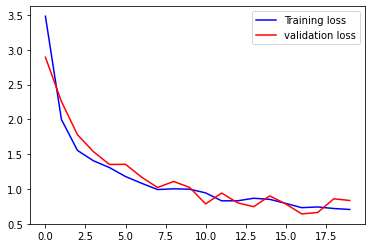

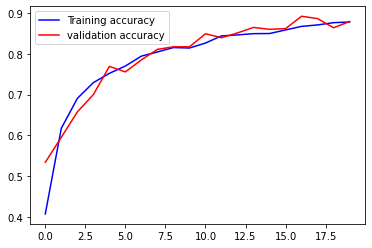

In [16]:
# plot the loss
plt.plot(r.history['loss'], color='b', label='Training loss')
plt.plot(r.history['val_loss'], color='r', label='validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], color='b', label='Training accuracy')
plt.plot(r.history['val_accuracy'], color='r', label='validation accuracy')
plt.legend()
plt.show()

In [17]:
model.save('Model/model_vgg19.h5')

## Testing the model

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model = load_model('Model/model_vgg19.h5')

In [21]:
img_path = 'data/train/quercus_imbricaria/1249060909_0000.jpg'


In [22]:
img = load_img(img_path, target_size=(224, 224))

In [23]:
x = image.img_to_array(img)
x.shape
x = x / 255

In [24]:
dirs = ['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'aesculus_pavi', 'ailanthus_altissima', 'albizia_julibrissin', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_lenta', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_cordiformis', 'carya_glabra', 'carya_ovata', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'cedrus_atlantica', 'cedrus_deodara', 'cedrus_libani', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chamaecyparis_pisifera', 'chamaecyparis_thyoides', 'chionanthus_retusus', 'chionanthus_virginicus', 'cladrastis_lutea', 'cornus_florida', 'cornus_kousa', 'cornus_mas', 'corylus_colurna', 'crataegus_crus-galli', 'crataegus_laevigata', 'crataegus_phaenopyrum', 'crataegus_pruinosa', 'crataegus_viridis', 'cryptomeria_japonica', 'diospyros_virginiana', 'eucommia_ulmoides', 'evodia_daniellii', 'fagus_grandifolia', 'ficus_carica', 'fraxinus_americana', 'fraxinus_nigra', 'fraxinus_pennsylvanica', 'ginkgo_biloba', 'gleditsia_triacanthos', 'gymnocladus_dioicus', 'halesia_tetraptera', 'ilex_opaca', 'juglans_cinerea', 'juglans_nigra', 'juniperus_virginiana', 'koelreuteria_paniculata', 'larix_decidua', 'liquidambar_styraciflua', 'liriodendron_tulipifera', 'maclura_pomifera', 'magnolia_acuminata', 'magnolia_denudata', 'magnolia_grandiflora', 'magnolia_macrophylla', 'magnolia_soulangiana', 'magnolia_stellata', 'magnolia_tripetala', 'magnolia_virginiana',
        'malus_angustifolia', 'malus_baccata', 'malus_coronaria', 'malus_floribunda', 'malus_hupehensis', 'malus_pumila', 'metasequoia_glyptostroboides', 'morus_alba', 'morus_rubra', 'nyssa_sylvatica', 'ostrya_virginiana', 'oxydendrum_arboreum', 'paulownia_tomentosa', 'phellodendron_amurense', 'picea_abies', 'picea_orientalis', 'picea_pungens', 'pinus_bungeana', 'pinus_cembra', 'pinus_densiflora', 'pinus_echinata', 'pinus_flexilis', 'pinus_koraiensis', 'pinus_nigra', 'pinus_parviflora', 'pinus_peucea', 'pinus_pungens', 'pinus_resinosa', 'pinus_rigida', 'pinus_strobus', 'pinus_sylvestris', 'pinus_taeda', 'pinus_thunbergii', 'pinus_virginiana', 'pinus_wallichiana', 'platanus_acerifolia', 'platanus_occidentalis', 'populus_deltoides', 'populus_grandidentata', 'populus_tremuloides', 'prunus_pensylvanica', 'prunus_sargentii', 'prunus_serotina', 'prunus_serrulata', 'prunus_subhirtella', 'prunus_virginiana', 'prunus_yedoensis', 'pseudolarix_amabilis', 'ptelea_trifoliata', 'pyrus_calleryana', 'quercus_acutissima', 'quercus_alba', 'quercus_bicolor', 'quercus_cerris', 'quercus_coccinea', 'quercus_falcata', 'quercus_imbricaria', 'quercus_macrocarpa', 'quercus_marilandica', 'quercus_michauxii', 'quercus_montana', 'quercus_muehlenbergii', 'quercus_nigra', 'quercus_palustris', 'quercus_phellos', 'quercus_robur', 'quercus_rubra', 'quercus_shumardii', 'quercus_stellata', 'quercus_velutina', 'quercus_virginiana', 'robinia_pseudo-acacia', 'salix_babylonica', 'salix_caroliniana', 'salix_matsudana', 'salix_nigra', 'sassafras_albidum', 'staphylea_trifolia', 'stewartia_pseudocamellia', 'styrax_japonica', 'styrax_obassia', 'syringa_reticulata', 'taxodium_distichum', 'tilia_americana', 'tilia_cordata', 'tilia_europaea', 'tilia_tomentosa', 'toona_sinensis', 'tsuga_canadensis', 'ulmus_americana', 'ulmus_glabra', 'ulmus_parvifolia', 'ulmus_pumila', 'ulmus_rubra', 'zelkova_serrata']

In [25]:
import numpy as np
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds = np.argmax(preds, axis=1)
plant_name = dirs[preds[0]]


In [26]:
import wikipedia

result = wikipedia.summary(plant_name, sentences=2)

print(result)


Quercus imbricaria, the shingle oak, is a deciduous tree in the red oak group of oaks.  It is native primarily to the Midwestern and Upper South regions of North America, from southern New York west to northern Illinois and eastern Kansas, and south to central Alabama and Arkansas.
